In [1]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Read datasets needed
from google.colab import files 
uploaded = files.upload()

Saving 0227_optimal_target_snuh.csv to 0227_optimal_target_snuh.csv
Saving 0227_X_NaN_snuh.csv to 0227_X_NaN_snuh.csv
Saving 0227_X_y_NaN_whole.csv to 0227_X_y_NaN_whole.csv
Saving demographic.csv to demographic.csv
Saving snuh_dx.csv to snuh_dx.csv


In [3]:
import io
proact_full = pd.read_csv(io.BytesIO(uploaded['0227_X_y_NaN_whole.csv'])) 
snuh_feature = pd.read_csv(io.BytesIO(uploaded['0227_X_NaN_snuh.csv']))  
snuh_target = pd.read_csv(io.BytesIO(uploaded['0227_optimal_target_snuh.csv']))  
proact_demographic = pd.read_csv(io.BytesIO(uploaded['demographic.csv']))  
snuh_demographic = pd.read_csv(io.BytesIO(uploaded['snuh_dx.csv'])) 

In [4]:
proact_full.drop(columns=['Unnamed: 0'], inplace = True)
snuh_feature.drop(columns=['Unnamed: 0'], inplace = True)
snuh_target.drop(columns=['Unnamed: 0'], inplace = True)
snuh_demographic.rename(columns={'Study_ID' : 'SubjectID', 'Age_dx' : 'Age'}, inplace = True)

In [5]:
proact_feature = proact_full.drop(['time_opt', 'status_opt'], axis = 1)
snuh_feature = snuh_feature[snuh_feature['SubjectID'].isin(list(snuh_target['SubjectID']))]

In [6]:
# mean_bulbar = mean_Q1 + mean_Q2 + mean_Q3
proact_feature['mean_bulbar'] = proact_feature['mean_bulbar'] + proact_feature['mean_Q2_Salivation']
snuh_feature['mean_bulbar'] = snuh_feature['mean_bulbar'] + snuh_feature['mean_Q2_Salivation']

# Set Age as numerical data
proact_feature.drop(columns=['Age'], inplace = True)
proact_feature = pd.merge(proact_demographic[['SubjectID','Age']], proact_feature, on = 'SubjectID')

snuh_feature.drop(columns=['Age'], inplace = True)
snuh_feature = pd.merge(snuh_demographic[['SubjectID','Age']], snuh_feature, on = 'SubjectID')

In [7]:
proact_feature

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,mean_fvc,mean_Creatinine,mean_weight,slope_weight,mean_ALSFRS_R_Total,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_R1_Dyspnea,mean_R2_Orthopnea,mean_R3_Respiratory_Insufficiency,mean_bulbar,mean_motor,mean_respiratory,slope_ALSFRS_R_Total,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_R1_Dyspnea,slope_R2_Orthopnea,slope_R3_Respiratory_Insufficiency,slope_bulbar,slope_motor,slope_respiratory
0,348,52.0,0.0,-9.928767,-16.471233,0.0,6.542466,NaN,53.04,120.033333,1.840796,38.250000,4.000000,4.000000,4.00,3.500000,2.00,2.250000,3.500000,2.000000,1.000000,4.0,4.000000,4.000000,12.000000,14.250000,12.000000,-0.497512,0.000000,0.000000,0.000000,0.497512,0.0,-0.497512,-0.497512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.497512,0.000000
1,533,65.0,0.0,-1.446575,-33.632877,1.0,32.186301,73.500000,79.56,51.000000,-0.167224,36.666667,1.000000,1.333333,2.00,4.000000,4.00,3.333333,4.000000,3.333333,2.666667,3.0,4.000000,4.000000,4.333333,21.333333,11.000000,-0.334448,-0.334448,-0.334448,0.000000,0.000000,0.0,-0.334448,0.000000,0.334448,0.334448,0.000000,0.000000,0.000000,-0.334448,0.334448,0.000000
2,902,77.0,0.0,-1.610959,-16.898630,0.0,15.287671,89.600000,NaN,62.220000,-0.602007,40.250000,4.000000,3.750000,3.25,4.000000,4.00,2.750000,4.000000,2.500000,1.000000,3.0,4.000000,4.000000,11.000000,18.250000,11.000000,-1.086957,0.000000,0.000000,0.362319,0.000000,0.0,-0.724638,0.000000,-0.362319,0.000000,-0.362319,0.000000,0.000000,0.362319,-1.086957,-0.362319
3,1736,41.0,1.0,-16.800000,-18.739726,0.0,1.939726,71.000000,58.40,121.400000,NaN,24.500000,2.500000,3.000000,3.00,1.500000,1.00,1.000000,0.500000,0.500000,0.000000,3.5,4.000000,4.000000,8.500000,4.500000,11.500000,-3.164557,-0.632911,-1.265823,0.000000,-0.632911,0.0,0.000000,-0.632911,-0.632911,0.000000,0.632911,0.000000,0.000000,-0.632911,-1.898734,0.632911
4,3971,55.0,0.0,-12.427397,-25.084932,0.0,12.657534,86.000000,53.04,88.900000,-1.250000,38.000000,4.000000,4.000000,4.00,4.000000,4.00,2.000000,3.000000,1.000000,0.000000,4.0,4.000000,4.000000,12.000000,14.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,998542,70.0,1.0,-2.400000,-9.435616,0.0,7.035616,85.000000,53.04,72.400000,NaN,35.500000,4.000000,3.000000,4.00,4.000000,3.00,2.000000,2.000000,2.000000,1.000000,2.5,4.000000,4.000000,11.000000,14.000000,10.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2823,998756,64.0,1.0,-7.923288,-20.120548,1.0,12.197260,73.333333,88.40,70.200000,NaN,34.000000,2.666667,2.666667,3.00,3.000000,3.00,3.000000,4.000000,3.000000,3.000000,2.0,2.000000,2.666667,8.333333,19.000000,6.666667,0.534759,0.000000,-0.534759,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.069519,0.000000,0.000000,1.069519
2824,999166,60.0,1.0,-1.610959,-32.843836,1.0,31.232877,75.000000,83.98,84.750000,NaN,43.000000,3.000000,3.000000,4.00,4.000000,4.00,4.000000,3.000000,3.000000,3.000000,4.0,4.000000,4.000000,10.000000,21.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2825,999823,55.0,1.0,-2.761644,-16.175342,0.0,13.413699,100.800000,NaN,70.460000,-0.535117,43.250000,2.750000,3.000000,2.75,4.000000,3.75,3.000000,4.000000,4.000000,4.000000,4.0,4.000000,4.000000,8.500000,22.750000,12.000000,-0.743494,-0.371747,0.000000,-0.371747,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.743494,0.000000,0.000000


In [8]:
snuh_feature

,SubjectID,Age,Gender,onset_site,onset_delta,diag_delta,diag_minus_onset,mean_fvc,mean_Creatinine,mean_weight,slope_weight,mean_ALSFRS_R_Total,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_R1_Dyspnea,mean_R2_Orthopnea,mean_R3_Respiratory_Insufficiency,mean_bulbar,mean_motor,mean_respiratory,slope_ALSFRS_R_Total,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_R1_Dyspnea,slope_R2_Orthopnea,slope_R3_Respiratory_Insufficiency,slope_bulbar,slope_motor,slope_respiratory
0,1655,59,1.0,1.0,-12.164384,-1.183562,10.980822,NaN,NaN,85.0,0.000000,45.0,2.5,3.500000,3.5,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.5,4.0,9.500000,24.000000,11.500000,0.000000,-0.440821,0.440821,0.440821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.440821,0.0,0.000000,0.000000,-0.440821
1,1654,51,1.0,0.0,-8.909589,-3.879452,5.030137,NaN,NaN,62.0,NaN,46.0,4.0,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.0,4.0,12.000000,22.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1650,63,0.0,1.0,-15.715068,-2.663014,13.052055,79.0,NaN,48.0,0.000000,39.0,2.0,2.666667,3.0,3.666667,3.333333,3.333333,3.333333,3.333333,2.666667,3.666667,4.0,4.0,7.666667,19.666667,11.666667,-3.119658,0.000000,-0.779915,0.389957,-0.389957,-0.389957,-0.389957,-0.389957,-0.389957,-0.389957,-0.389957,0.000000,0.0,0.389957,-2.339744,-0.389957
3,1722,49,1.0,0.0,-9.665753,-7.660274,2.005479,89.0,NaN,69.0,NaN,41.5,4.0,4.000000,3.5,2.000000,3.000000,3.000000,3.000000,3.500000,3.500000,4.000000,4.0,4.0,11.500000,18.000000,12.000000,-1.185065,0.000000,0.000000,-0.395022,0.000000,0.000000,0.000000,0.000000,-0.395022,-0.395022,0.000000,0.000000,0.0,-0.395022,-0.790043,0.000000
4,1642,71,1.0,0.0,-42.772603,-0.690411,42.082192,NaN,82.000000,63.5,-0.475260,41.0,4.0,4.000000,3.5,3.000000,3.000000,3.000000,3.000000,3.000000,2.500000,4.000000,4.0,4.0,11.500000,17.500000,12.000000,0.000000,0.000000,0.000000,0.475260,0.000000,0.000000,0.000000,0.000000,0.000000,-0.475260,0.000000,0.000000,0.0,0.475260,-0.475260,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,1019,61,0.0,0.0,-16.767123,-4.734247,12.032877,77.0,NaN,56.0,0.000000,40.5,4.0,4.000000,3.5,3.000000,4.000000,2.500000,3.000000,3.000000,1.500000,4.000000,4.0,4.0,11.500000,17.000000,12.000000,-1.002747,0.000000,0.000000,-0.334249,0.000000,0.000000,-0.334249,0.000000,0.000000,-0.334249,0.000000,0.000000,0.0,-0.334249,-0.668498,0.000000
217,1017,72,0.0,1.0,-6.739726,-0.756164,5.983562,46.5,62.000000,51.5,-1.382576,31.5,2.5,3.000000,3.0,2.500000,2.500000,2.000000,2.000000,2.500000,1.500000,2.500000,3.5,4.0,8.500000,13.000000,10.000000,-1.382576,-0.460859,-0.921717,0.000000,0.460859,0.460859,0.000000,0.921717,-0.460859,0.460859,-1.382576,-0.460859,0.0,-0.460859,1.843434,-1.843434
218,1005,31,1.0,0.0,-4.504110,-1.545205,2.958904,77.0,80.666667,69.0,0.000000,33.0,4.0,4.000000,4.0,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,4.000000,4.0,4.0,12.000000,9.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,1058,58,1.0,1.0,-4.339726,-3.320548,1.019178,59.0,NaN,85.0,-1.126543,42.0,3.0,4.000000,3.0,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.0,4.0,10.000000,21.000000,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#1. Compare feature distribution

## (1) Histogram

In [9]:
def compare_feature_distribution_proact_snuh(feature):
  fig = plt.figure(figsize=(10, 3))

  plt.subplot(121)
  plt.title('PROACT')
  sns.histplot(x=proact_feature[feature])

  plt.subplot(122)
  plt.title('SNUH')
  sns.histplot(x=snuh_feature[feature])
  plt.show()

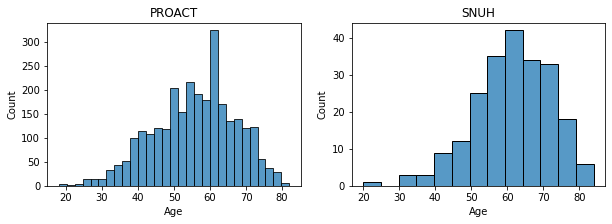

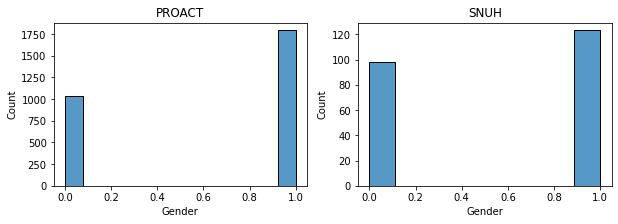

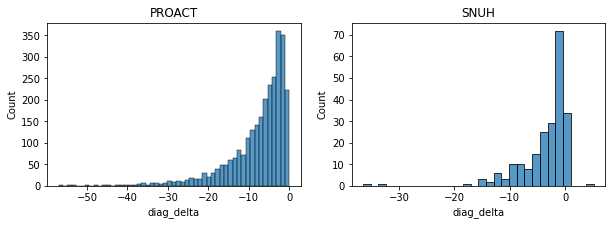

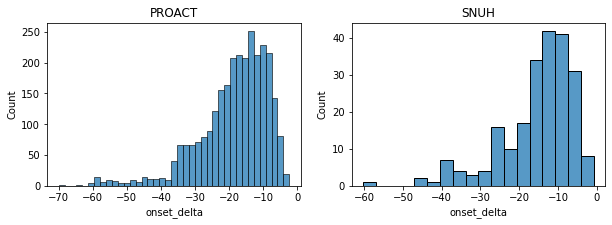

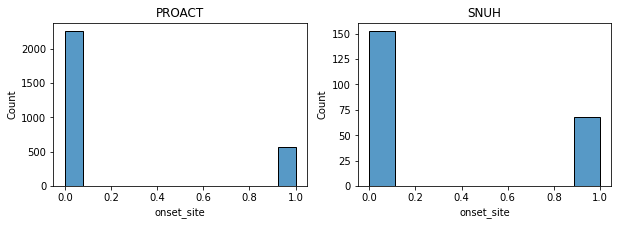

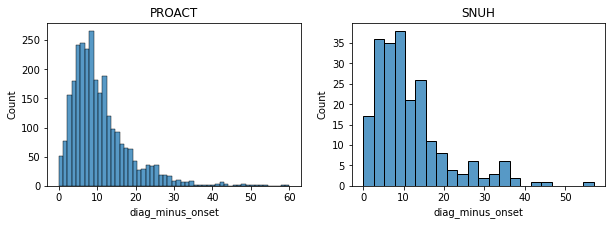

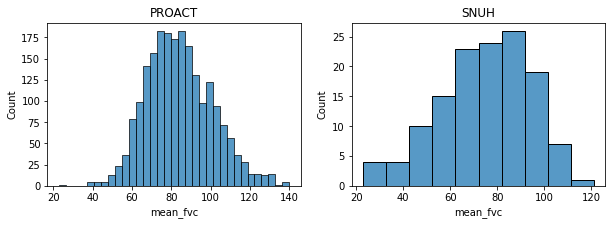

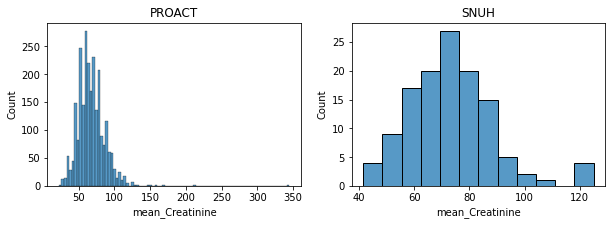

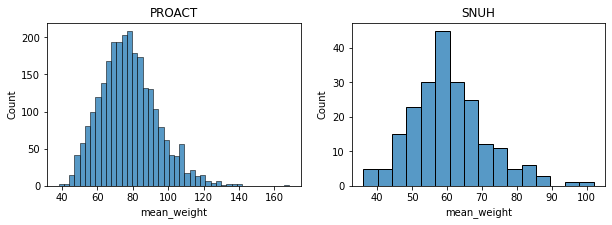

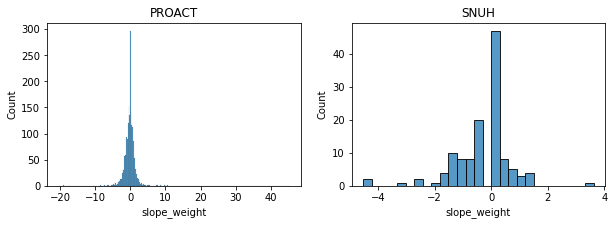

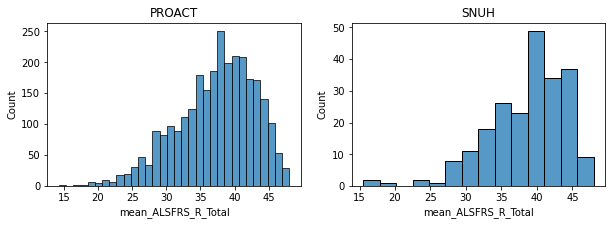

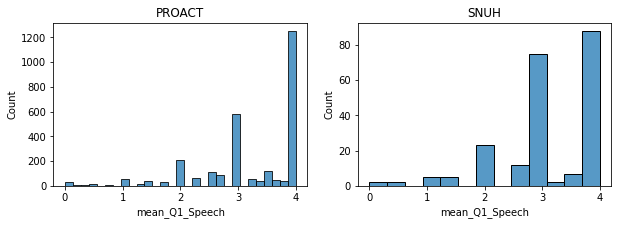

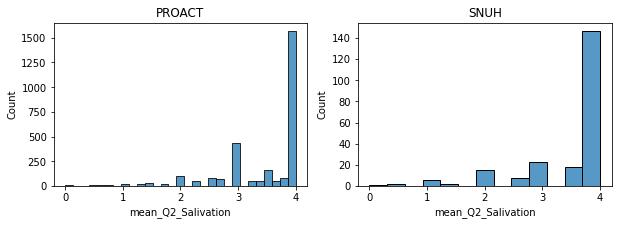

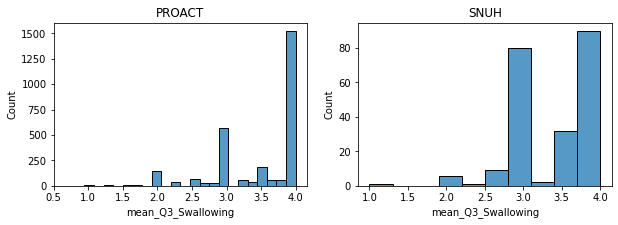

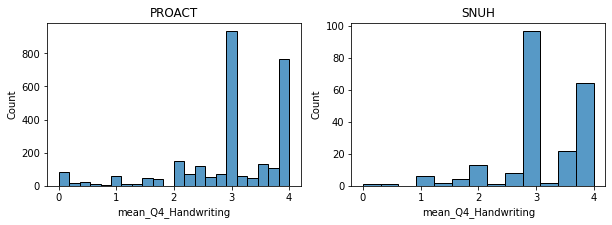

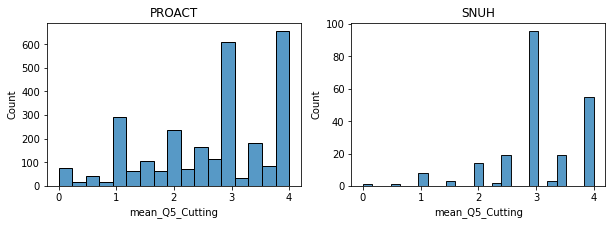

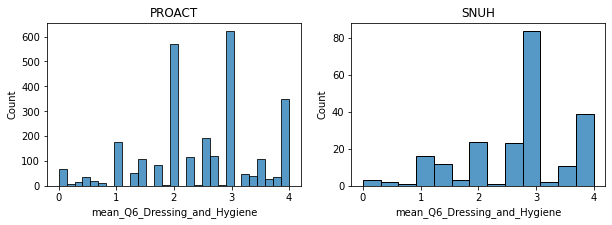

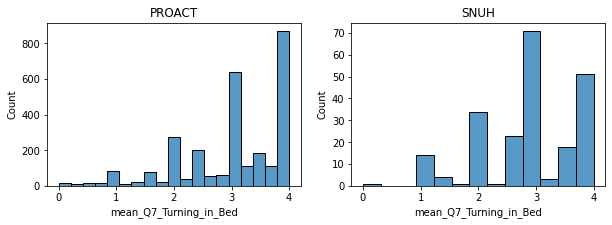

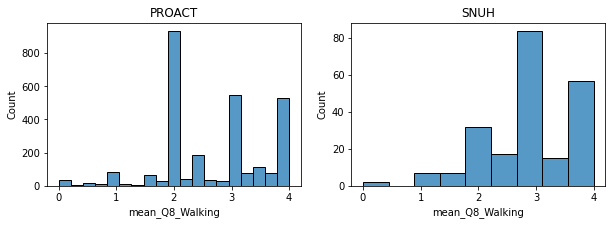

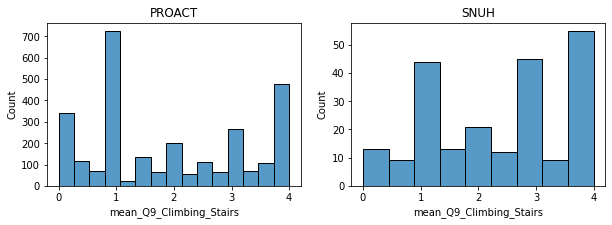

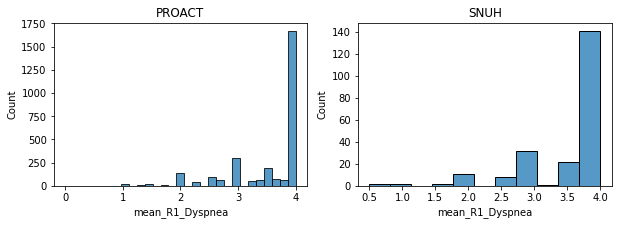

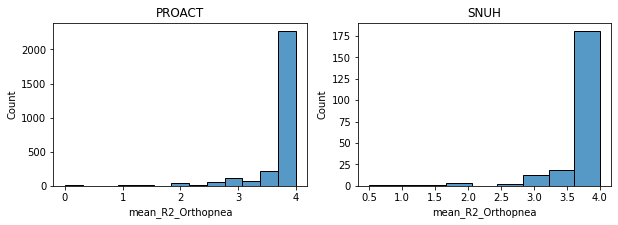

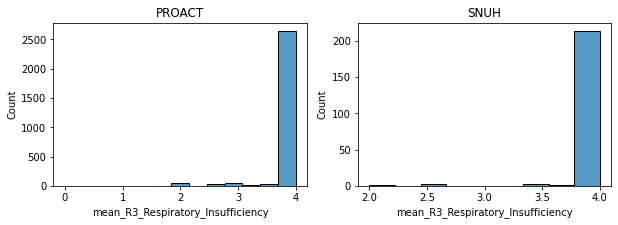

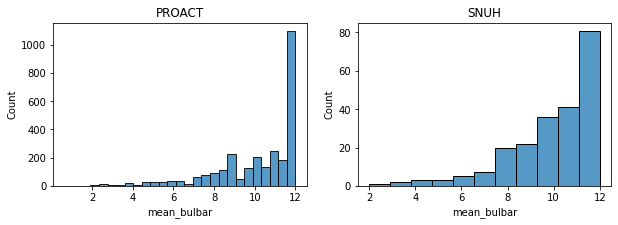

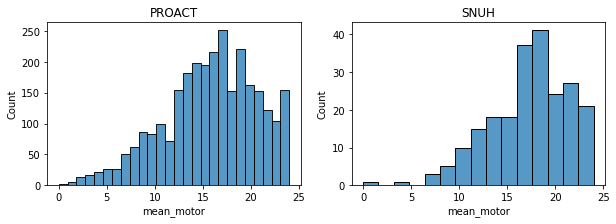

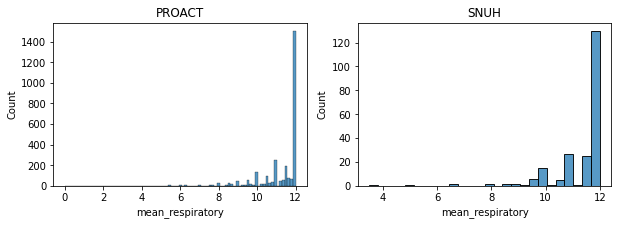

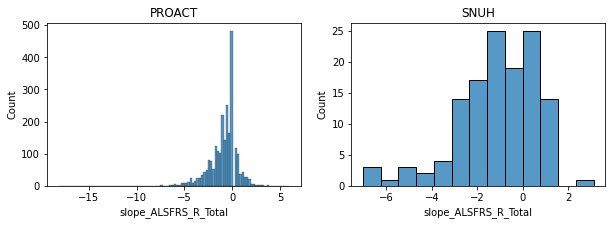

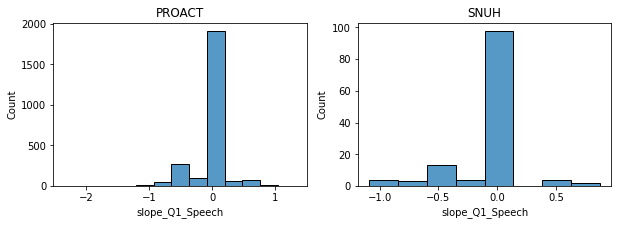

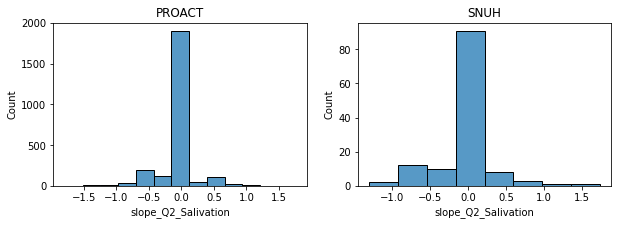

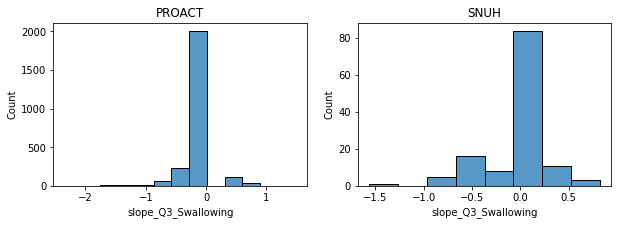

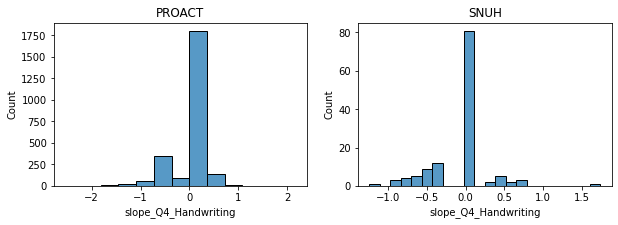

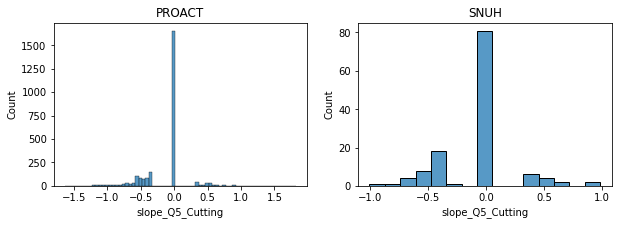

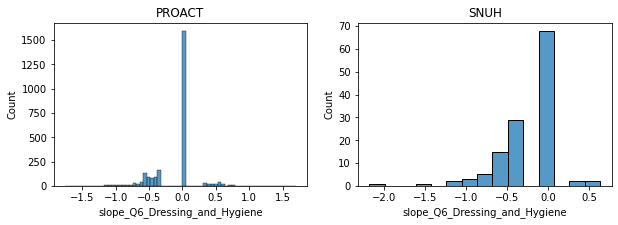

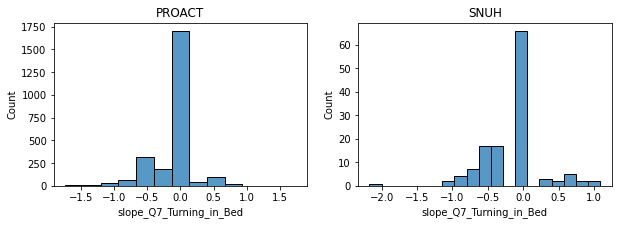

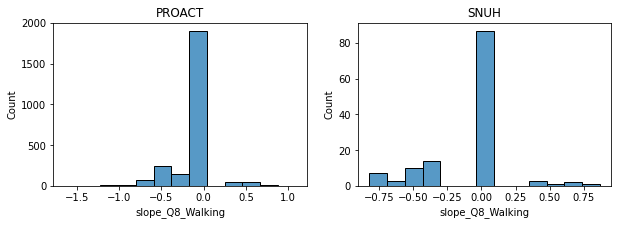

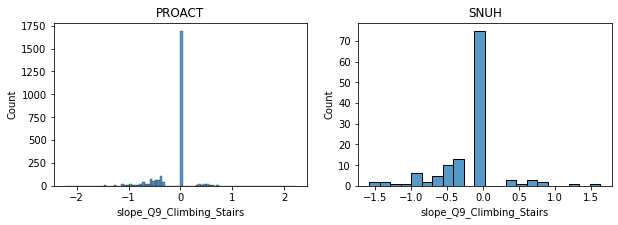

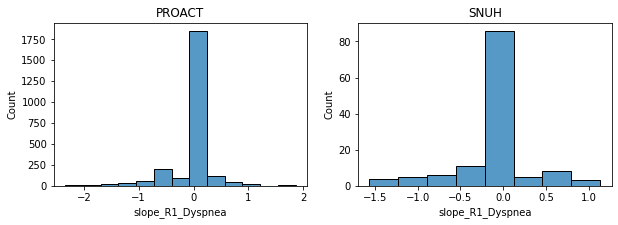

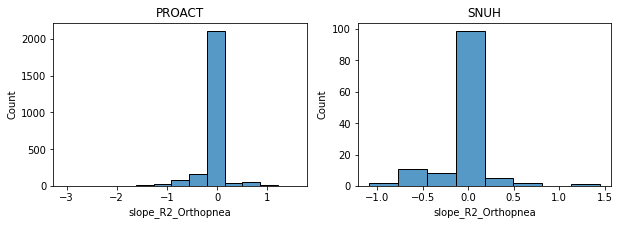

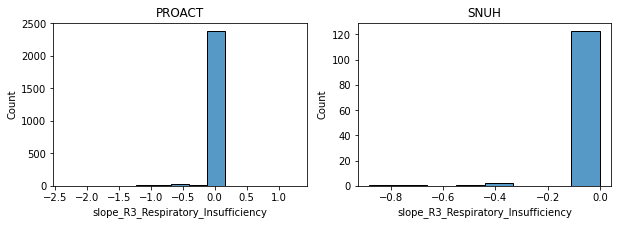

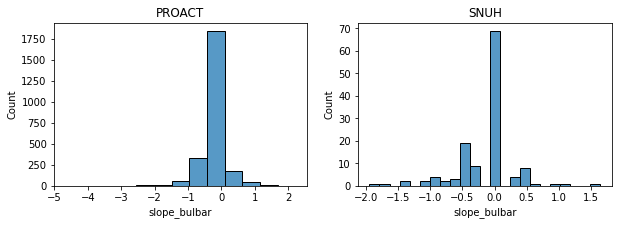

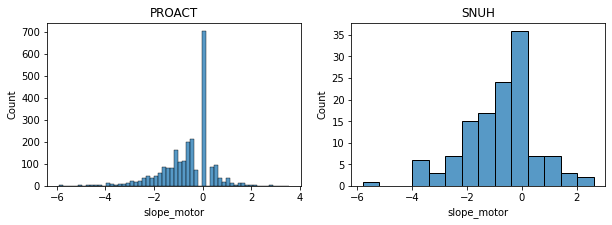

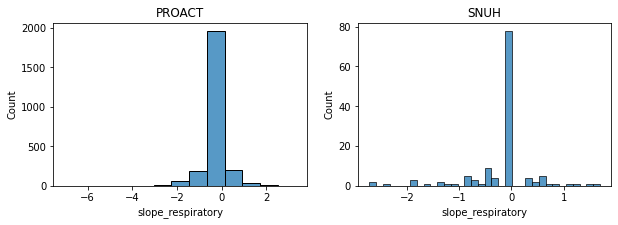

In [10]:
feature_list = list(proact_feature.columns)
feature_list.remove('SubjectID')

for feature in feature_list:
  compare_feature_distribution_proact_snuh(feature)

## (2) Check normality with Shapiro test

In [11]:
import scipy.stats as st

In [12]:
count = 0
for feature in feature_list:
  statistic1, pvalue1 = st.shapiro(proact_feature[feature].dropna())
  statistic2, pvalue2 = st.shapiro(snuh_feature[feature].dropna())

  check_normal1 = 'normal' if pvalue1 >= 0.05 else 'not normal'
  check_normal2 = 'normal' if pvalue2 >= 0.05 else 'not normal'
  if((check_normal1 == 'normal') or (check_normal2 == 'normal')): count += 1
  print(feature + ' of proact is ' + check_normal1)
  print(feature + ' of snuh is ' + check_normal2)
  print(count)

Age of proact is not normal
Age of snuh is not normal
0
Gender of proact is not normal
Gender of snuh is not normal
0
diag_delta of proact is not normal
diag_delta of snuh is not normal
0
onset_delta of proact is not normal
onset_delta of snuh is not normal
0
onset_site of proact is not normal
onset_site of snuh is not normal
0
diag_minus_onset of proact is not normal
diag_minus_onset of snuh is not normal
0
mean_fvc of proact is not normal
mean_fvc of snuh is not normal
0
mean_Creatinine of proact is not normal
mean_Creatinine of snuh is not normal
0
mean_weight of proact is not normal
mean_weight of snuh is not normal
0
slope_weight of proact is not normal
slope_weight of snuh is not normal
0
mean_ALSFRS_R_Total of proact is not normal
mean_ALSFRS_R_Total of snuh is not normal
0
mean_Q1_Speech of proact is not normal
mean_Q1_Speech of snuh is not normal
0
mean_Q2_Salivation of proact is not normal
mean_Q2_Salivation of snuh is not normal
0
mean_Q3_Swallowing of proact is not normal
m

In [13]:
df_summary = pd.DataFrame(columns=['feature', 'Group', 'N', '25%', '50%', '75%', 'p-value'])

for feature in feature_list:
  row_proact = [feature, 'Proact', len(proact_feature[feature].dropna())] + list(np.percentile(proact_feature[feature].dropna(), [25, 50, 75], interpolation='linear'))
  row_snuh = [feature, 'Snuh', len(snuh_feature[feature].dropna())] + list(np.percentile(snuh_feature[feature].dropna(), [25, 50, 75], interpolation='linear'))

  u, pvalue = st.mannwhitneyu(x=proact_feature[feature].dropna(), y=snuh_feature[feature].dropna(), alternative = 'two-sided')

  row_proact.append(pvalue)
  row_snuh.append(pvalue)

  df_summary = df_summary.append(pd.Series(row_proact, index=df_summary.columns), ignore_index=True)
  df_summary = df_summary.append(pd.Series(row_snuh, index=df_summary.columns), ignore_index=True)

df_summary

,feature,Group,N,25%,50%,75%,p-value
0,Age,Proact,2827,48.000000,56.000000,64.000000,1.443208e-13
1,Age,Snuh,221,55.000000,63.000000,70.000000,1.443208e-13
2,Gender,Proact,2827,0.000000,1.000000,1.000000,2.199706e-02
3,Gender,Snuh,221,0.000000,1.000000,1.000000,2.199706e-02
4,diag_delta,Proact,2827,-10.224658,-5.326027,-2.531507,5.167450e-28
...,...,...,...,...,...,...,...
79,slope_bulbar,Snuh,128,-0.396321,0.000000,0.000000,1.411217e-01
80,slope_motor,Proact,2494,-1.127820,-0.476190,0.000000,1.440627e-01
81,slope_motor,Snuh,128,-1.520171,-0.696352,0.000000,1.440627e-01
82,slope_respiratory,Proact,2494,0.000000,0.000000,0.000000,8.873474e-01


In [14]:
print('Male : '+ str(len(proact_feature[proact_feature['Gender']==1])) + ', Female : '+ str(len(proact_feature[proact_feature['Gender']==0])) + ' in Proact data')
print('Male : '+ str(len(snuh_feature[snuh_feature['Gender']==1]))+ ', Female : '+ str(len(snuh_feature[snuh_feature['Gender']==0]))+ ' in Snuh data')


Male : 1792, Female : 1035 in Proact data
Male : 123, Female : 98 in Snuh data


In [15]:
proact_gender = [len(proact_feature[proact_feature['Gender']==0]), len(proact_feature[proact_feature['Gender']==1])]
snuh_gender = [len(snuh_feature[snuh_feature['Gender']==0]), len(snuh_feature[snuh_feature['Gender']==1])]
st.chisquare(proact_gender, snuh_gender)

Power_divergenceResult(statistic=31605.70474531276, pvalue=0.0)

In [16]:
print('bulbar : '+ str(len(proact_feature[proact_feature['onset_site']==1])) + ', non-bulbar : '+ str(len(proact_feature[proact_feature['onset_site']==0])) + ' in Proact data')
print('bulbar : '+ str(len(snuh_feature[snuh_feature['onset_site']==1]))+ ', non-bulbar : '+ str(len(snuh_feature[snuh_feature['onset_site']==0]))+ ' in Snuh data')


bulbar : 565, non-bulbar : 2262 in Proact data
bulbar : 68, non-bulbar : 153 in Snuh data


In [17]:
proact_onset_site = [len(proact_feature[proact_feature['onset_site']==0]), len(proact_feature[proact_feature['onset_site']==1])]
snuh_onset_site = [len(snuh_feature[snuh_feature['onset_site']==0]), len(snuh_feature[snuh_feature['onset_site']==1])]
st.chisquare(proact_onset_site, snuh_onset_site)

Power_divergenceResult(statistic=32703.602941176472, pvalue=0.0)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
df_summary.to_csv('/content/drive/MyDrive/Colab Notebooks/본 실험/0227/feature_distribution_summary_0227.csv')

In [ ]:
stats.levene(proact_feature.dropna()['mean_fvc'], snuh_feature.dropna()['mean_fvc'])

LeveneResult(statistic=2.4454992199317203, pvalue=0.11817687891160568)

In [ ]:
stats.ttest_ind(proact_feature.dropna()['mean_fvc'], snuh_feature.dropna()['mean_fvc'], equal_var= True)

Ttest_indResult(statistic=2.707649576232209, pvalue=0.00689103522558628)

#2.Compare target distribution

In [20]:
proact_target = proact_full[['SubjectID', 'time_opt', 'status_opt']]
snuh_target = snuh_target[snuh_target['SubjectID'].isin(list(snuh_feature['SubjectID']))]

In [21]:
proact_target

,SubjectID,time_opt,status_opt
0,348,13.18,0
1,533,9.44,1
2,902,5.06,0
3,1736,8.02,1
4,3971,12.43,0
...,...,...,...
2822,998542,0.26,0
2823,998756,2.10,0
2824,999166,12.82,0
2825,999823,6.05,0


In [22]:
snuh_target

,SubjectID,time_opt,status_opt
0,1005,30.378082,1
1,1017,3.024658,0
2,1019,20.515068,0
3,1020,2.926027,0
4,1021,47.769863,0
...,...,...,...
216,1654,3.221918,0
217,1655,2.268493,0
218,1722,2.531507,0
219,11871,12.361644,0


In [26]:
len(proact_target[proact_target['status_opt'] == 1])

629

In [27]:
len(snuh_target[snuh_target['status_opt'] == 1])

27

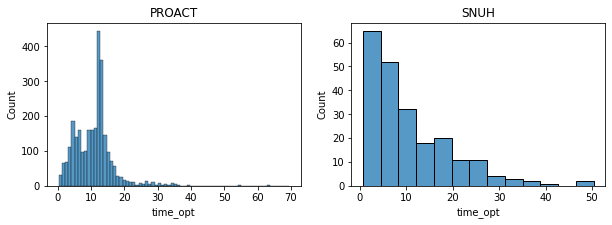

In [23]:
  # showing all time_opt
  fig = plt.figure(figsize=(10, 3))

  plt.subplot(121)
  plt.title('PROACT')
  sns.histplot(x=proact_target['time_opt'])

  plt.subplot(122)
  plt.title('SNUH')
  sns.histplot(x=snuh_target['time_opt'])
  plt.show()

In [28]:
np.percentile(proact_target['time_opt'], [0, 25, 50, 75, 100], interpolation='linear')

array([ 0.23,  6.48, 11.61, 13.32, 69.5 ])

In [29]:
np.percentile(snuh_target['time_opt'], [0, 25, 50, 75, 100], interpolation='linear')

array([ 0.69041096,  4.0109589 ,  7.82465753, 15.87945205, 50.33424658])

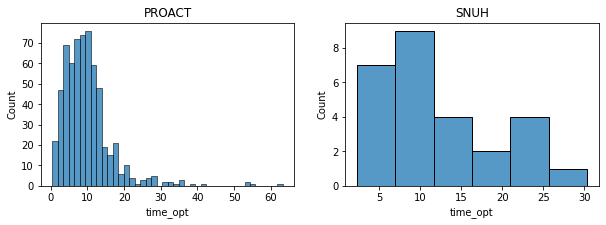

In [24]:
# showing time_opt with status_opt = 1
fig = plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.title('PROACT')
sns.histplot(x=proact_target[proact_target['status_opt'] == 1]['time_opt'])

plt.subplot(122)
plt.title('SNUH')
sns.histplot(x=snuh_target[snuh_target['status_opt'] == 1]['time_opt'])
plt.show()

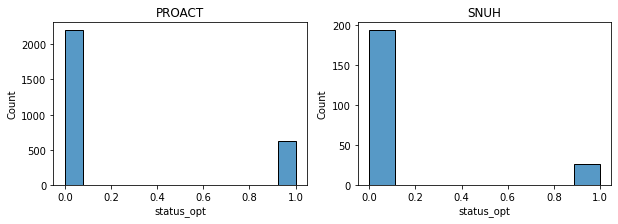

In [25]:
  # censored proportion
  fig = plt.figure(figsize=(10, 3))

  plt.subplot(121)
  plt.title('PROACT')
  sns.histplot(x=proact_target['status_opt'])

  plt.subplot(122)
  plt.title('SNUH')
  sns.histplot(x=snuh_target['status_opt'])
  plt.show()